In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWirbPc4N_3_moBxqcQ73sMc_DtwhduqSd5zIoqWGv36iLaagm-lbmA
Mounted at /content/drive


In [ ]:
import pandas as pd
import csv
import re

data = pd.read_csv('/content/drive/MyDrive/Data.csv',encoding='utf-8')
data.head(6)

,품종,색상,성별,체중,중성화여부,당시의나이,보호소형태,상태
0,7,1,0,3.10,0,3,1,1
1,3,2,0,7.95,0,3,1,1
2,4,4,1,2.75,0,2,1,1
3,4,3,0,4.00,1,1,1,1
4,7,3,1,3.00,1,5,1,1
5,7,5,1,5.00,1,6,1,0


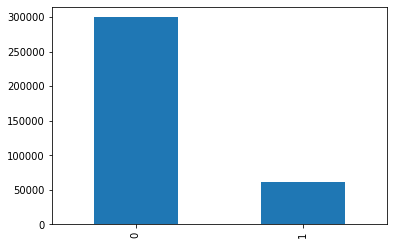

In [ ]:
data['보호소형태'].value_counts().plot.bar()


In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X = np.array(data.loc[:, data.columns != '보호소형태'])
y = np.array(data.loc[:, data.columns == '보호소형태']).reshape(-1, 1)

In [ ]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

# smote 전 로지스틱

In [ ]:
# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

In [ ]:
# fit the model
clf.fit(X_train, y_train.ravel())

# prediction for training dataset
train_pred = clf.predict(X_train)

# prediction for testing dataset
test_pred = clf.predict(X_test)

In [ ]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.8297272727272728
Accuracy score for Testing Dataset =  0.8297244011913252


In [ ]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted       0     All
True                     
0          200794  200794
1           41206   41206
All        242000  242000


In [ ]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted       0     All
True                     
0           98899   98899
1           20296   20296
All        119195  119195


# SMOTE 후 모델성능평가

In [ ]:
#Using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_new.shape, y_train_new.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_new).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (242000, 7) (242000, 1)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (401588, 7) (401588,)
SMOTE 적용 후 레이블 값 분포: 
 1    200794
0    200794
dtype: int64


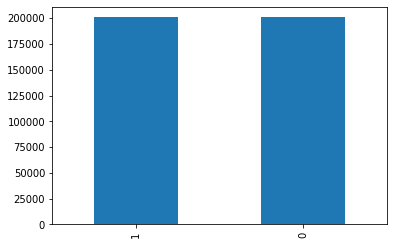

In [ ]:

# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [ ]:
# smote 후 로지스틱 
# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [ ]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.5635875573971334
Accuracy score for Testing Dataset =  0.5474726288854398


In [ ]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted       0       1     All
True                             
0          107884   92910  200794
1           82348  118446  200794
All        190232  211356  401588


In [ ]:
82348/200794

0.41011185593195015

In [ ]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted      0      1     All
True                           
0          53400  45499   98899
1           8440  11856   20296
All        61840  57355  119195


In [ ]:
5440/20296

0.26803310997240837